# FIT5149 S1 2009 Assessment 1: Choosing and Explaining Likely Caravan Insurance Customers


Student information
- Family Name: Shah
- Given Name: Nisheeth
- Student ID: 29599644
- Student email: nsha0020@student.monash.edu

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- psych
- ggplot2
- GGally
- ResourceSelection
- MASS
- e1071
- caret
- tidyverse
- knitr
- dlookr
- DescTools
- pROC

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

This focus of this assignment is to extract knowledge from car insurance data. We will help the comapany to analyse customer data and implement a marketing strategy. For this, first we predict top 800 customers who are most probable to buy the insurance (feature - V86). We will compare these top 800 probabilities with their true values and find those who don't have insurance (0s in true values). The marketing strategy is target those customers who do not have insurance but are highly probable to have insurance.

The overall data consists of 3 files
- targetdata (data which we will use for training our model)
- testdata (for prediction using the best model)
- target (true values)


Let us load the required libraries

In [19]:
# install.packages("psych", repos='http://cran.us.r-project.org')
library(psych)
library(ggplot2)
library(GGally)
library(ResourceSelection)
library(MASS)
library(e1071)
library(caret)
library(tidyverse)
library(knitr)
library(dlookr)
library(DescTools)
library(pROC)

Load the data files

In [20]:
# Read data

traindata <- read.table("ticdata2000.txt", header = FALSE)
testdata <- read.table("ticeval2000.txt", header = FALSE)
targets <- read.table("tictgts2000.txt", header = FALSE)

Check the dimensions of each dataset

In [21]:
dim(traindata)
dim(testdata)
dim(targets)

[1] 5822   86

[1] 4000   85

[1] 4000    1

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

We need to know the features (columns) in our train data. Therefore str() provides the number of records, number of variables and typre of each variable -

In [22]:
str(traindata)

'data.frame':	5822 obs. of  86 variables:
 $ V1 : int  33 37 37 9 40 23 39 33 33 11 ...
 $ V2 : int  1 1 1 1 1 1 2 1 1 2 ...
 $ V3 : int  3 2 2 3 4 2 3 2 2 3 ...
 $ V4 : int  2 2 2 3 2 1 2 3 4 3 ...
 $ V5 : int  8 8 8 3 10 5 9 8 8 3 ...
 $ V6 : int  0 1 0 2 1 0 2 0 0 3 ...
 $ V7 : int  5 4 4 3 4 5 2 7 1 5 ...
 $ V8 : int  1 1 2 2 1 0 0 0 3 0 ...
 $ V9 : int  3 4 4 4 4 5 5 2 6 2 ...
 $ V10: int  7 6 3 5 7 0 7 7 6 7 ...
 $ V11: int  0 2 2 2 1 6 2 2 0 0 ...
 $ V12: int  2 2 4 2 2 3 0 0 3 2 ...
 $ V13: int  1 0 4 2 2 3 0 0 3 2 ...
 $ V14: int  2 4 4 3 4 5 3 5 3 2 ...
 $ V15: int  6 5 2 4 4 2 6 4 3 6 ...
 $ V16: int  1 0 0 3 5 0 0 0 0 0 ...
 $ V17: int  2 5 5 4 4 5 4 3 1 4 ...
 $ V18: int  7 4 4 2 0 4 5 6 8 5 ...
 $ V19: int  1 0 0 4 0 2 0 2 1 2 ...
 $ V20: int  0 0 0 0 5 0 0 0 1 0 ...
 $ V21: int  1 0 0 0 4 0 0 0 0 0 ...
 $ V22: int  2 5 7 3 0 4 4 2 1 3 ...
 $ V23: int  5 0 0 1 0 2 1 5 8 3 ...
 $ V24: int  2 4 2 2 0 2 5 2 1 3 ...
 $ V25: int  1 0 0 3 9 2 0 2 1 1 ...
 $ V26: int  1 2 5 2 0 

We will check any missing data (NA) in train, test and targets data. Below counts the total NAs in each data

In [23]:
sum(sapply(traindata, function(x) sum(is.na(x))))
sum(sapply(testdata, function(x) sum(is.na(x))))
sum(sapply(targets, function(x) sum(is.na(x))))

[1] 0

[1] 0

[1] 0

Its a good start. We don't have NAs in all the datasets.
V86 is our target variable. Therefore, lets see what it contains...

[1] "Percentages of factors in V86:"



         0          1 
0.94022673 0.05977327 

[1] "Counts of factors in V86:"



   0    1 
5474  348 

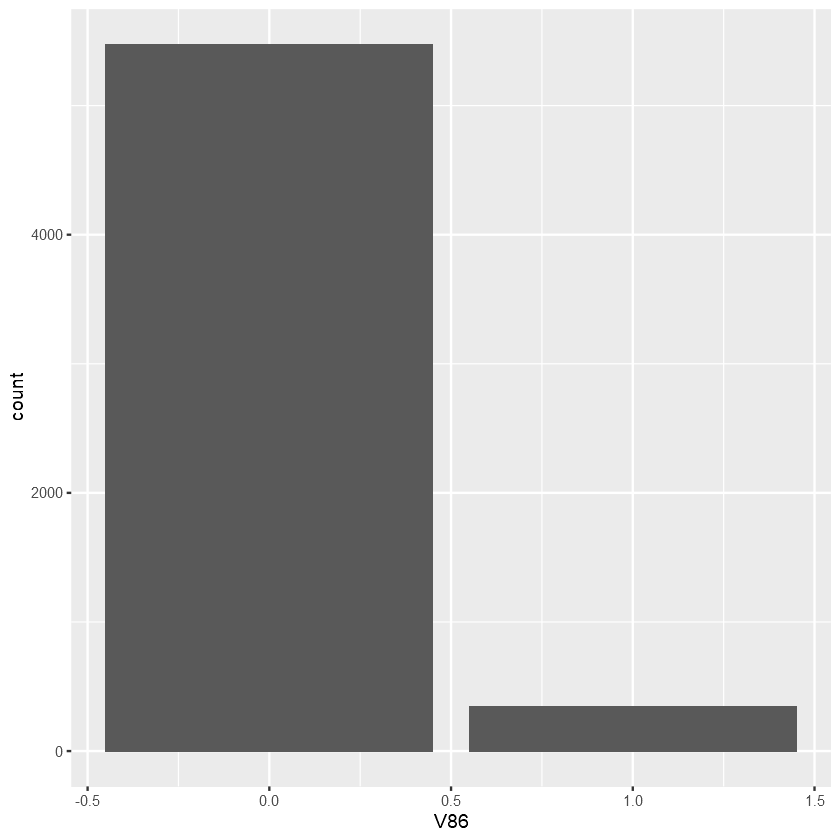

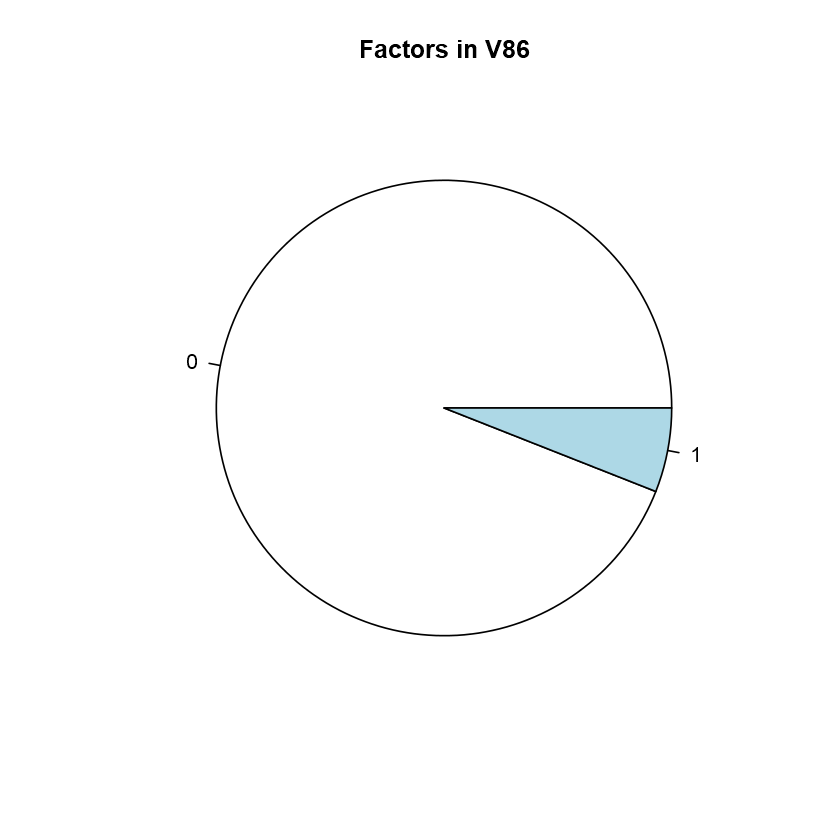

In [24]:
print("Percentages of factors in V86:")
prop.table(table(traindata$V86))

print("Counts of factors in V86:")
table(traindata$V86)
ggplot(data = traindata) +
  geom_bar(mapping = aes(x = V86))

# Pie Chart
pie(table(traindata$V86), main="Factors in V86")

Find the descriptive statistics of variables. Describe the interesting observations.

In [25]:
summary(traindata)

       V1              V2               V3              V4       
 Min.   : 1.00   Min.   : 1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:10.00   1st Qu.: 1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :30.00   Median : 1.000   Median :3.000   Median :3.000  
 Mean   :24.25   Mean   : 1.111   Mean   :2.679   Mean   :2.991  
 3rd Qu.:35.00   3rd Qu.: 1.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :41.00   Max.   :10.000   Max.   :5.000   Max.   :6.000  
       V5               V6               V7              V8      
 Min.   : 1.000   Min.   :0.0000   Min.   :0.000   Min.   :0.00  
 1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.:4.000   1st Qu.:0.00  
 Median : 7.000   Median :0.0000   Median :5.000   Median :1.00  
 Mean   : 5.774   Mean   :0.6965   Mean   :4.627   Mean   :1.07  
 3rd Qu.: 8.000   3rd Qu.:1.0000   3rd Qu.:6.000   3rd Qu.:2.00  
 Max.   :10.000   Max.   :9.0000   Max.   :9.000   Max.   :5.00  
       V9             V10             V11              V12      
 Min.   :0.

As we have too many features, it is difficult to go through the stats for all

In [26]:
sort(apply(traindata[-13], 2, sd))

V81         V60         V71         V77         V79         V78 
 0.02269603  0.04346231  0.06281898  0.07278179  0.07740285  0.08053247 
        V82         V84         V85         V74         V72         V69 
 0.08163169  0.09046308  0.11999594  0.12418945  0.12577516  0.12999073 
        V66         V67         V62         V57         V63         V56 
 0.13413312  0.14209190  0.15689413  0.19247101  0.20455962  0.20926025 
        V83         V51         V53         V70         V86         V73 
 0.21098563  0.21273793  0.22890577  0.22897363  0.23708666  0.24075469 
        V50         V75         V61         V45         V58         V76 
 0.24467545  0.26511246  0.27302780  0.36267990  0.37527432  0.37756936 
         V2         V64         V65         V46         V48         V41 
 0.40584207  0.40901641  0.49263066  0.49997980  0.53134646  0.55155731 
        V80         V52         V68         V20          V3         V54 
 0.56205805  0.60307570  0.60476712  0.77507292  0.78983454  0.81313326 
         V4         V49         V55         V44         V11          V6 
 0.81458881  0.89722203  0.89809982  0.95862304  0.96592375  1.00323378 
         V8         V21         V40         V33         V29         V42 
 1.01750254  1.05692611  1.16282924  1.20307234  1.30317535  1.31778305 
        V26         V27         V32          V9         V34         V14 
 1.33066382  1.52931855  1.55279945  1.59764655  1.59971402  1.61997300 
        V16         V24          V7         V12         V25         V23 
 1.62296742  1.69284293  1.71584254  1.72264489  1.72288245  1.73083958 
        V17         V19         V22         V59         V38         V10 
 1.76105173  1.79832127  1.83967490  1.87929000  1.88265646  1.90948247 
        V39         V28         V35         V36         V15         V43 
 1.92773824  1.93556826  1.97867493  1.98189267  2.00528334  2.00715048 
        V37         V18          V5         V47         V30         V31 
 2.08609934  2.29812528  2.85675983  2.92066898  3.08930163  3.08983700 
         V1 
12.84670570

The lowest standard deviation is for "V81" variable, and "V1" has the highest standard deviation.

We shall visualise the spread of each feature using boxplot

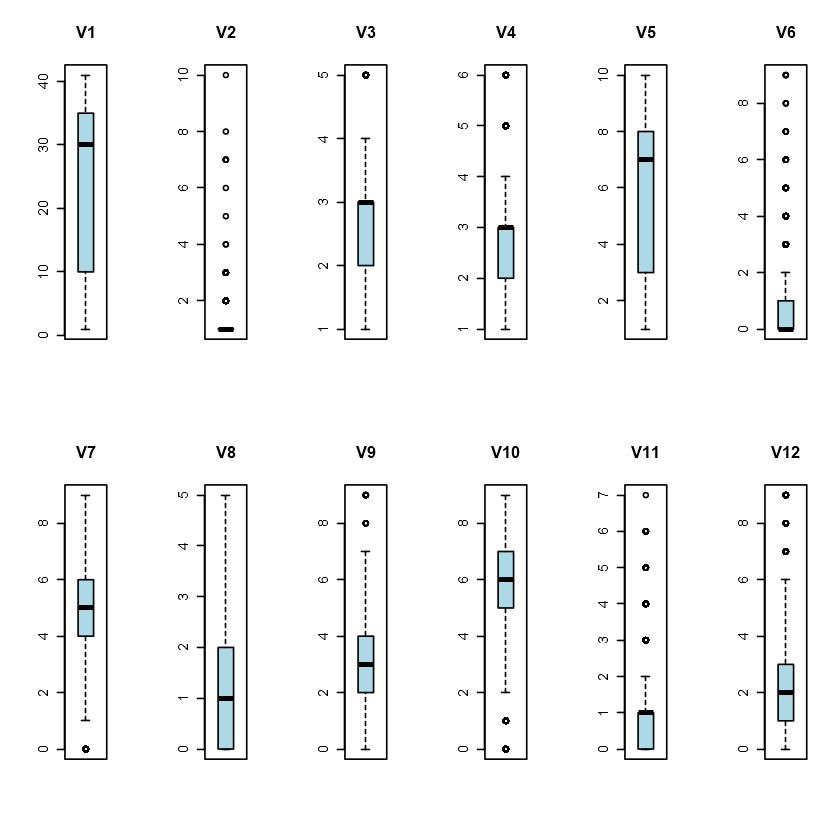

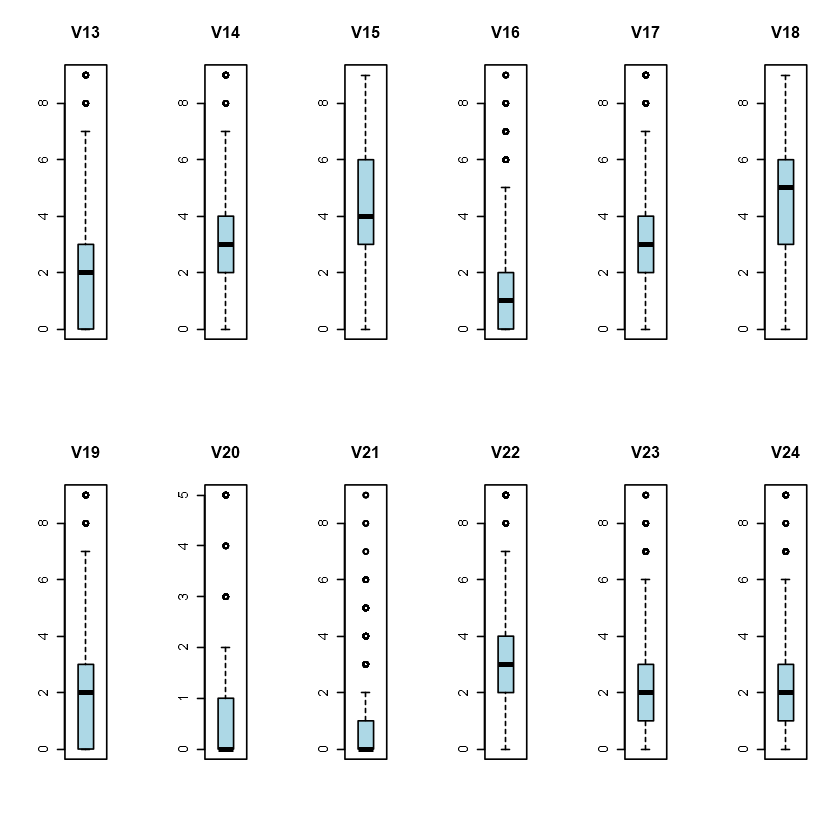

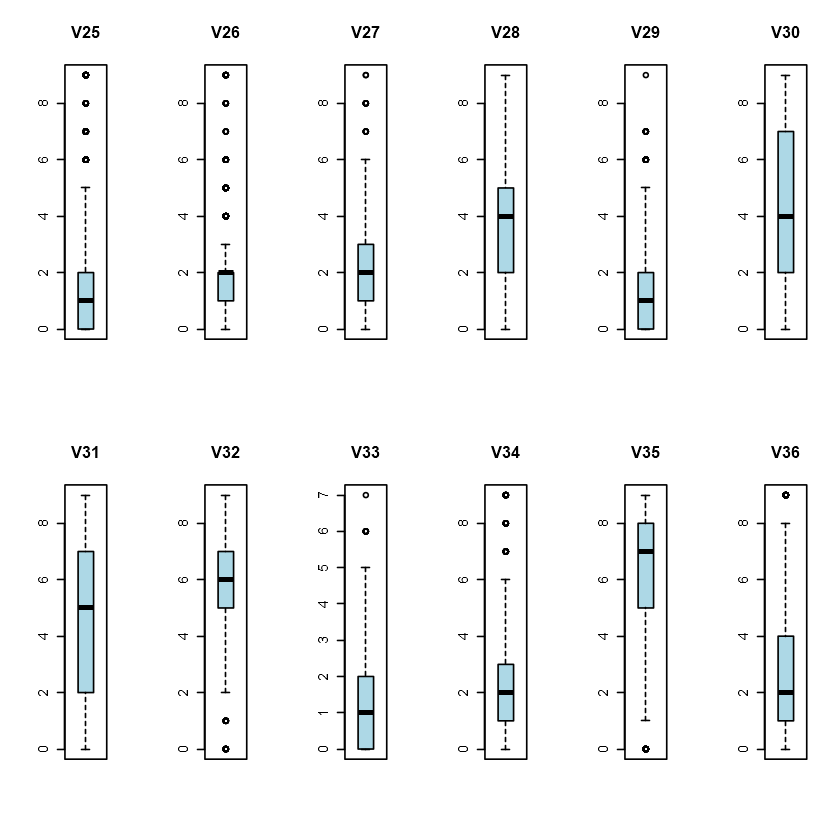

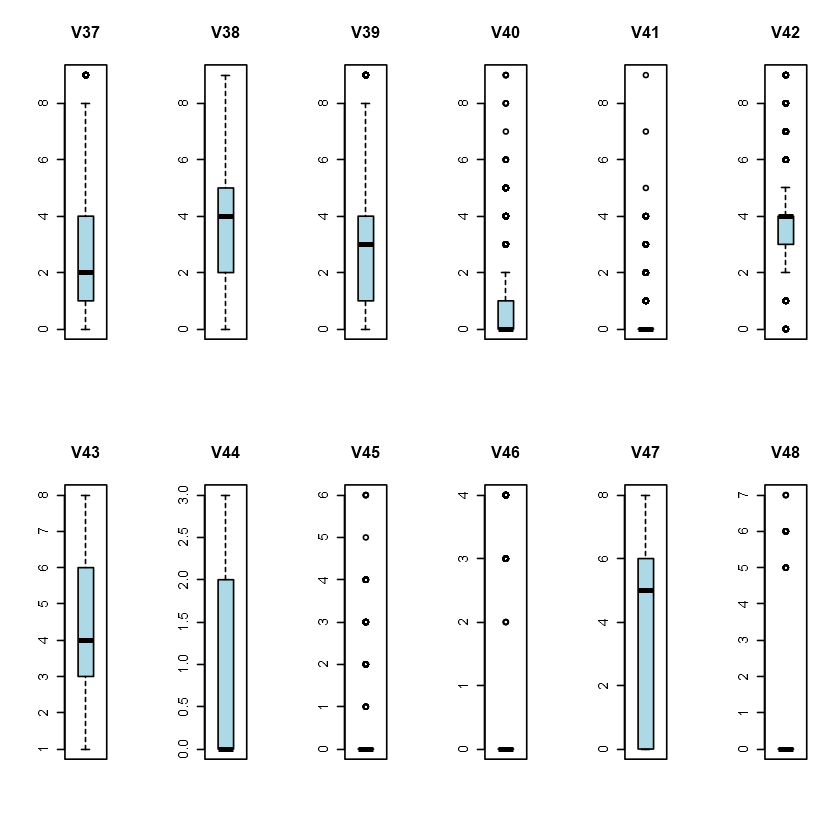

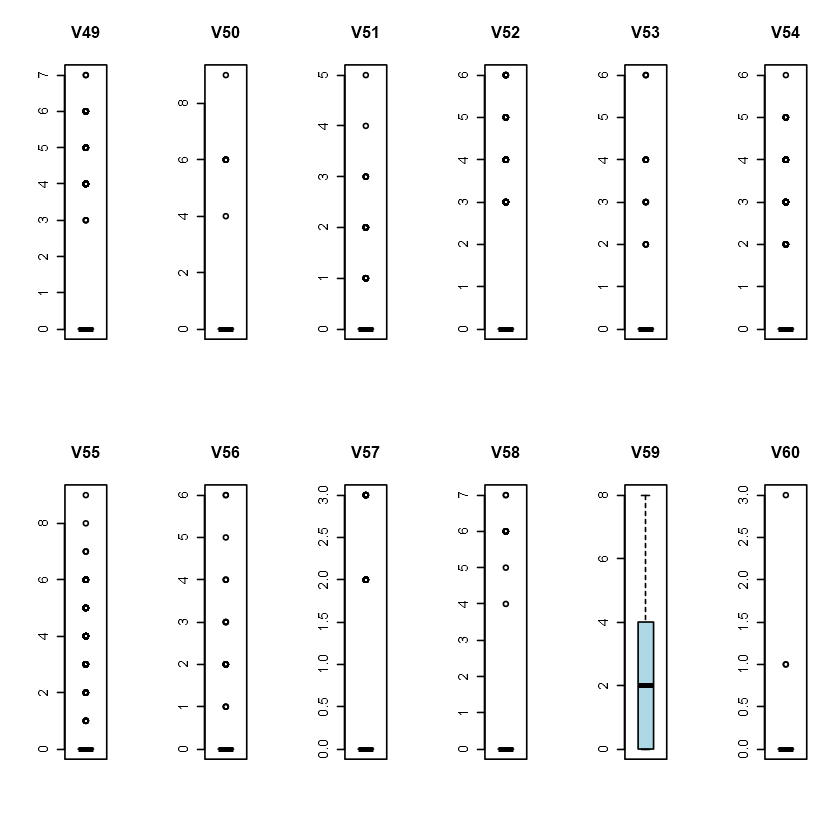

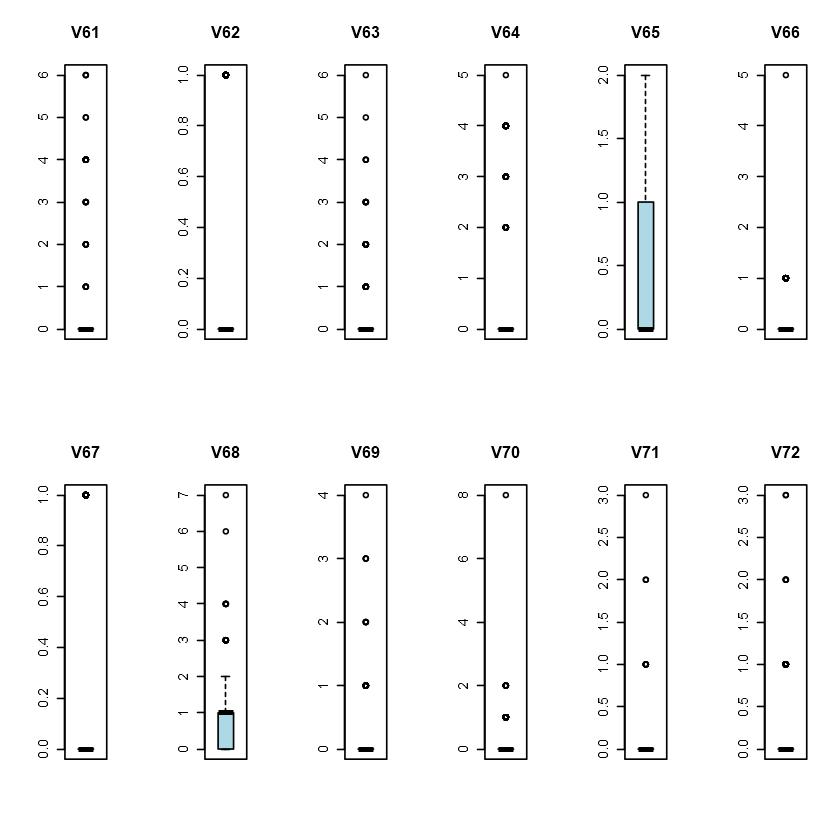

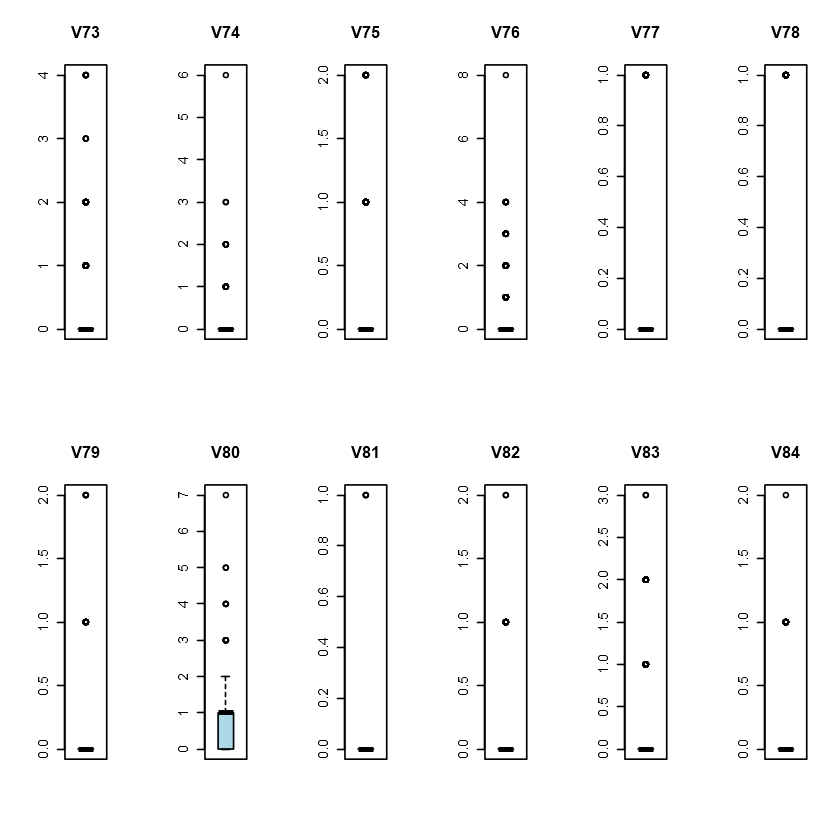

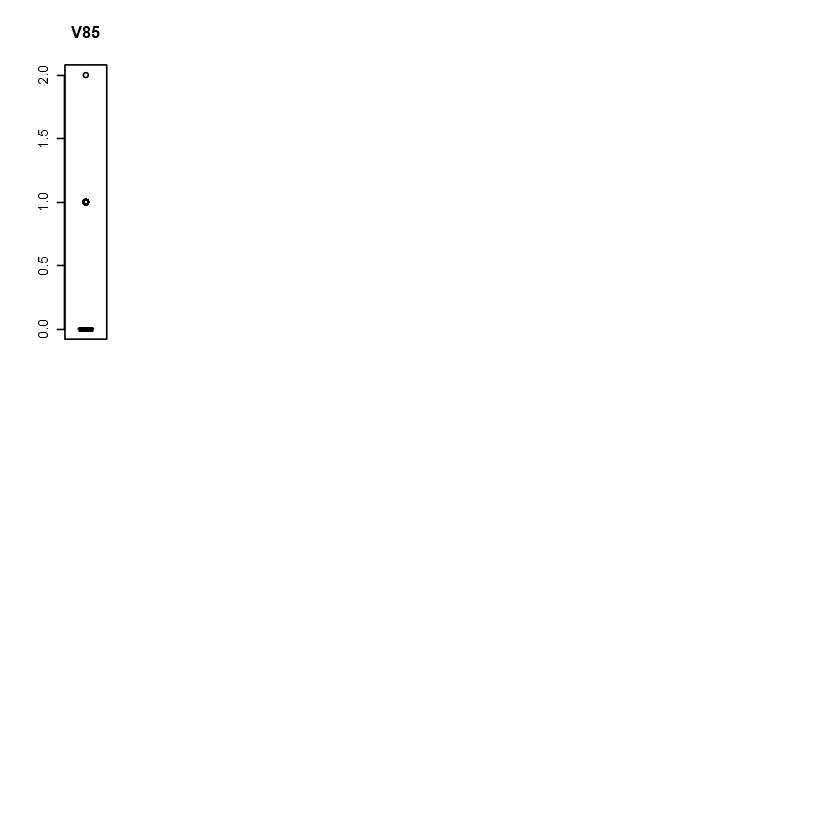

In [27]:
# or you can plot them all in a loop, notice the different scales now
par(mfrow = c(2,6)) # 6 x 2 grid
for (i in 1:(length(traindata) - 1)) {
        boxplot(traindata[,i], main = names(traindata[i]), type="l", col = 'lightblue') # I like blue
}

We want to know the correlation of features with our target. We first graph correlation for first 10 features and V86. Fitting all 86 in our graph will be very difficult to read the result.

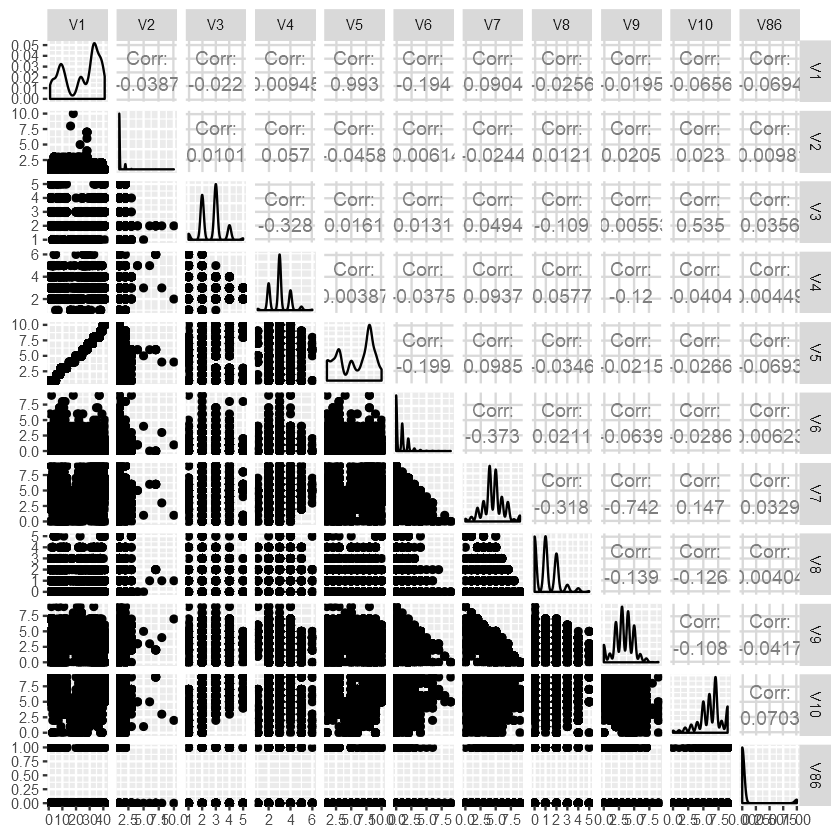

In [28]:
ggpairs(traindata, columns = c("V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V86"))

It seems that it will be very inconvenient to group 10 features and find correlation with V86.

So lets create a table for correlation of each feature with V86 and display it in descending order i.e. high positively correlated on top

In [29]:
corr_df <- data.frame(matrix(ncol = 2, nrow = 86))
x <- c("Feature", "Corr")
colnames(corr_df) <- x

corr_table <- vector()

for (i in 1:86){
    corr_table <- c(corr_table, round(cor(traindata$V86, traindata[,i]), 4)) 
}

# corr_table

corr_df$Feature <- 1:86
corr_df$Corr <- corr_table

head(corr_df[order(corr_df$Corr, decreasing = TRUE),], 20)
# tail(corr_df[order(corr_df$Corr, decreasing = TRUE),], 20)

,Feature,Corr
86,86,1.0000
47,47,0.1509
68,68,0.1442
82,82,0.1057
44,44,0.0965
43,43,0.0959
59,59,0.0944
61,61,0.0914
42,42,0.0902
65,65,0.0894


We see that V47, V68, V82 are 3 features that are highly correlated with V86. We will consider to use top 20 fearures in our model further in the assignment.


In the meantime, we check plot bar graph for 10 top correlated features with V86

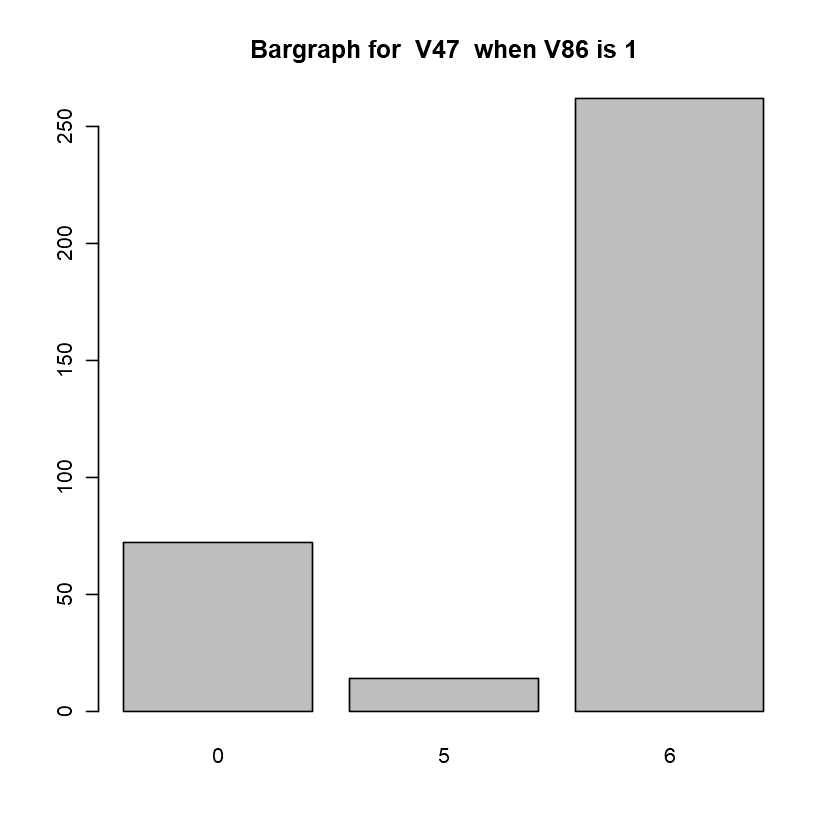

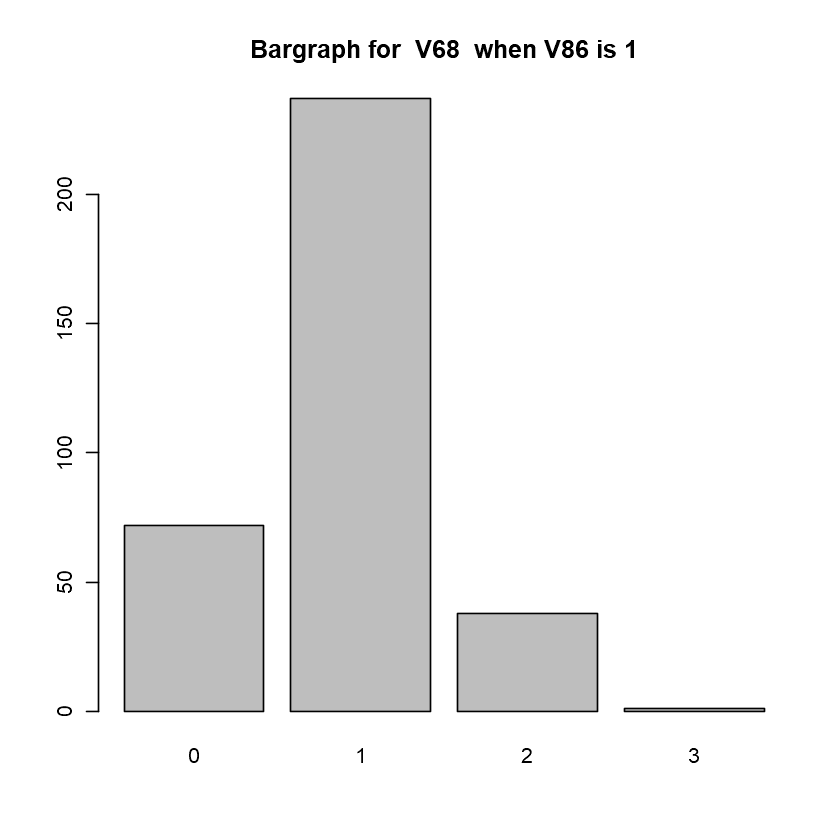

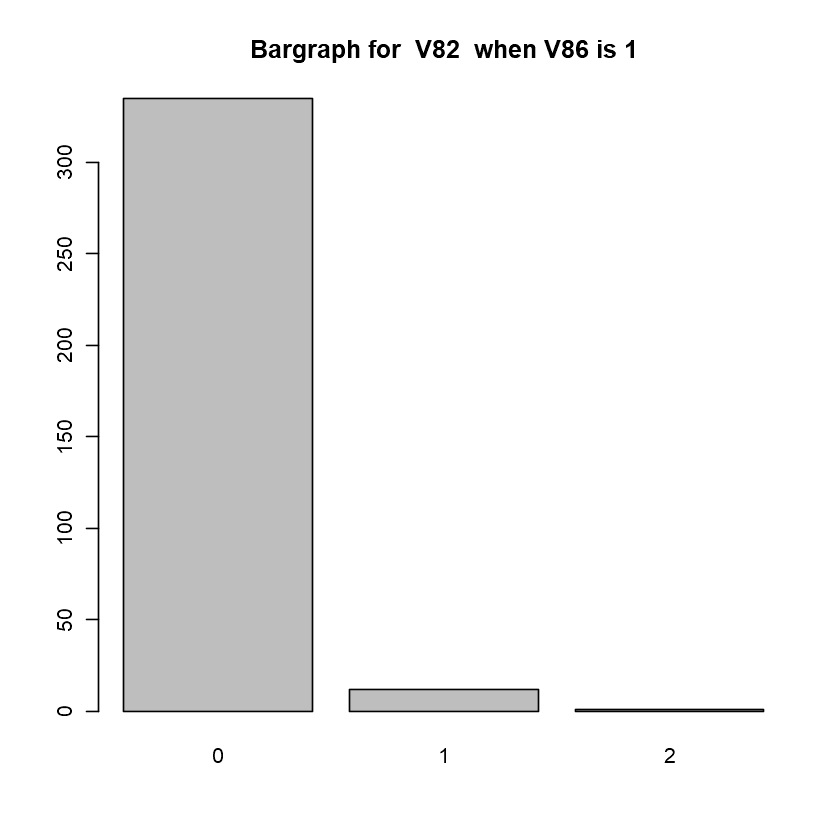

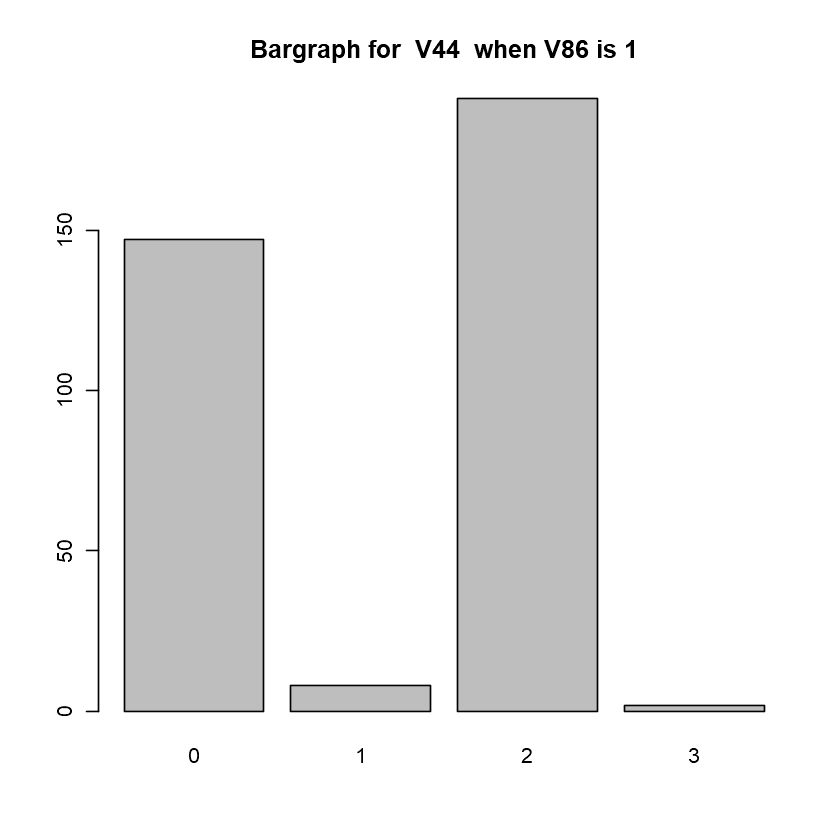

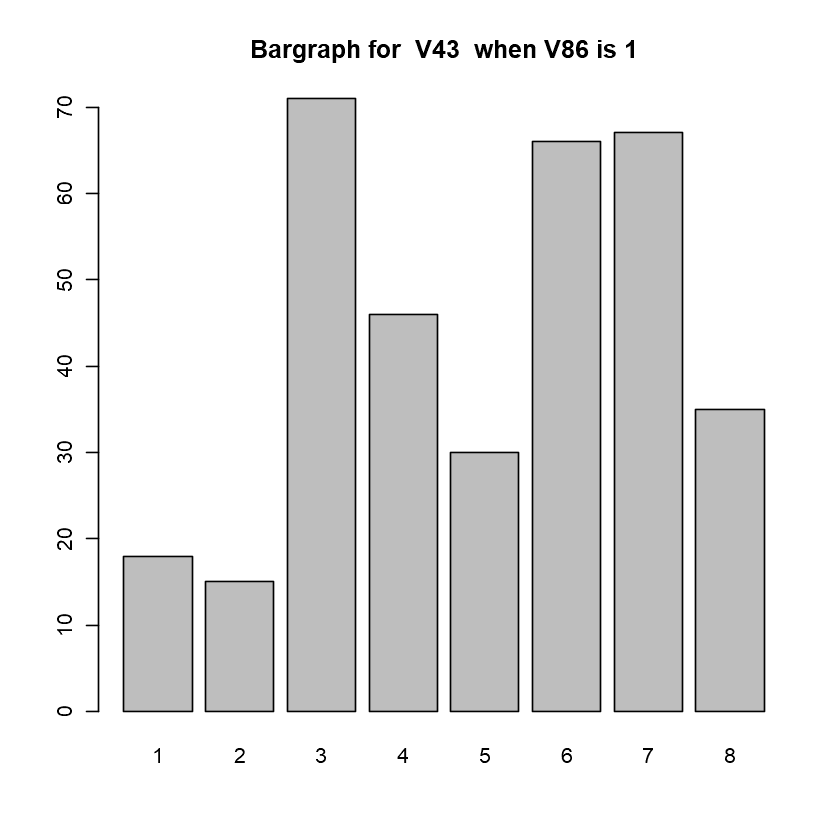

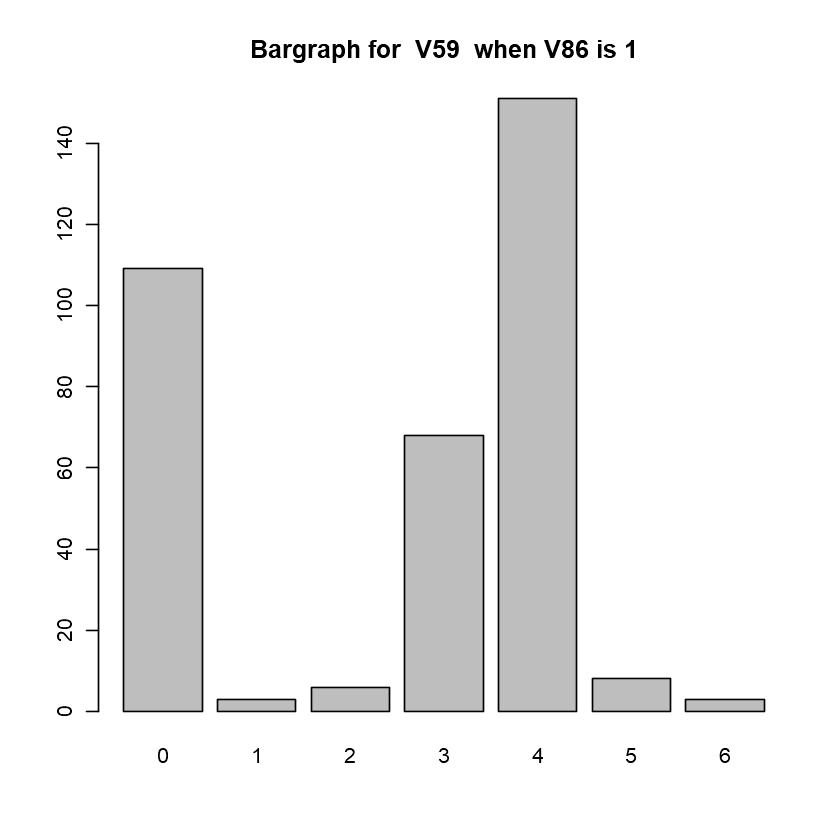

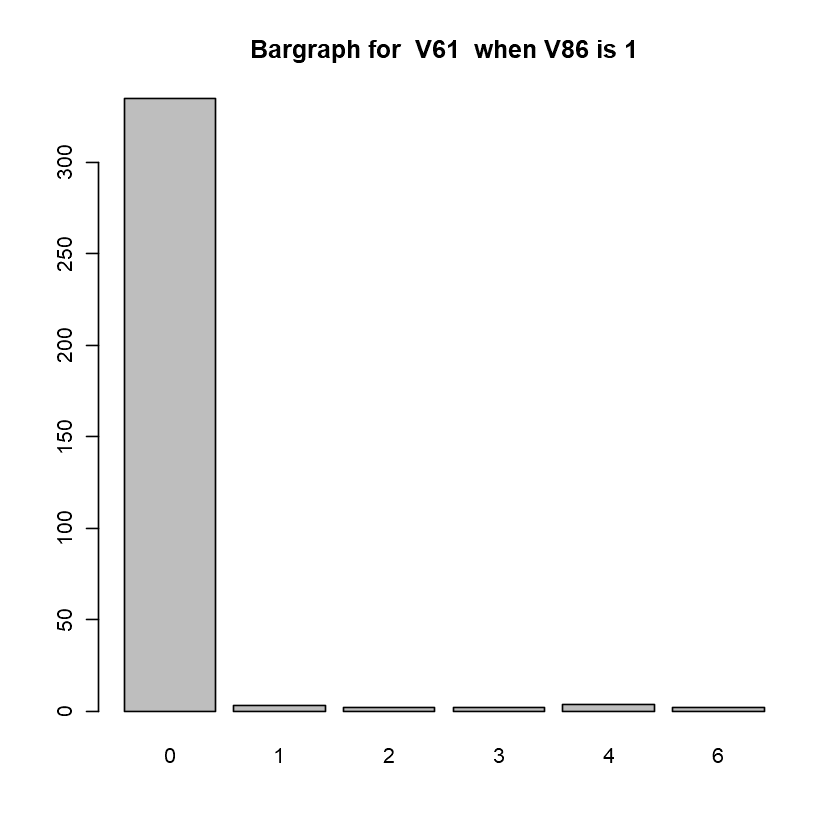

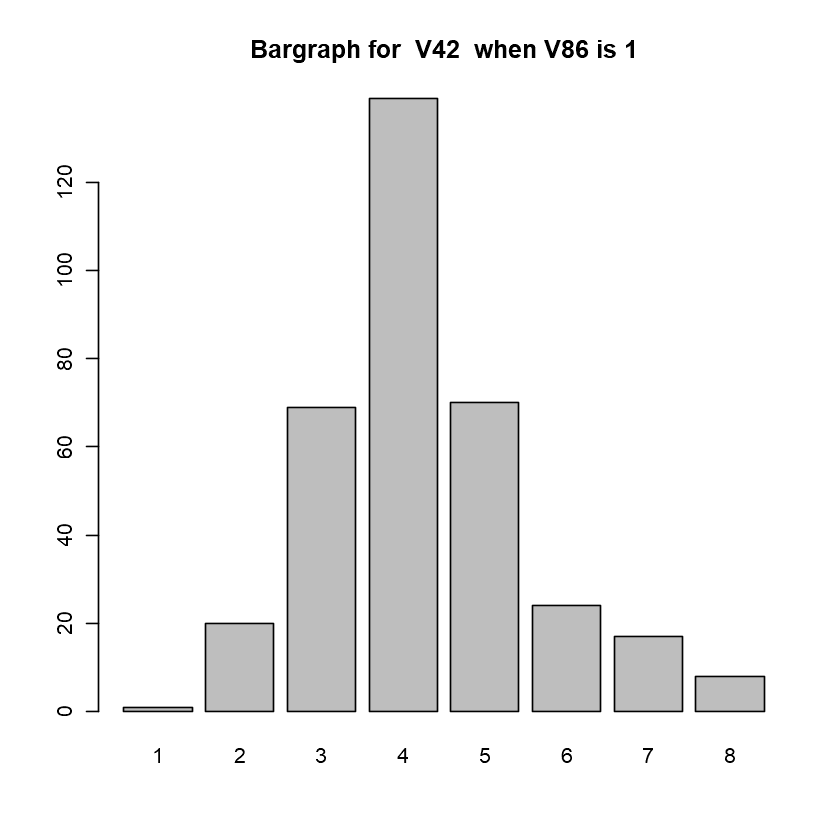

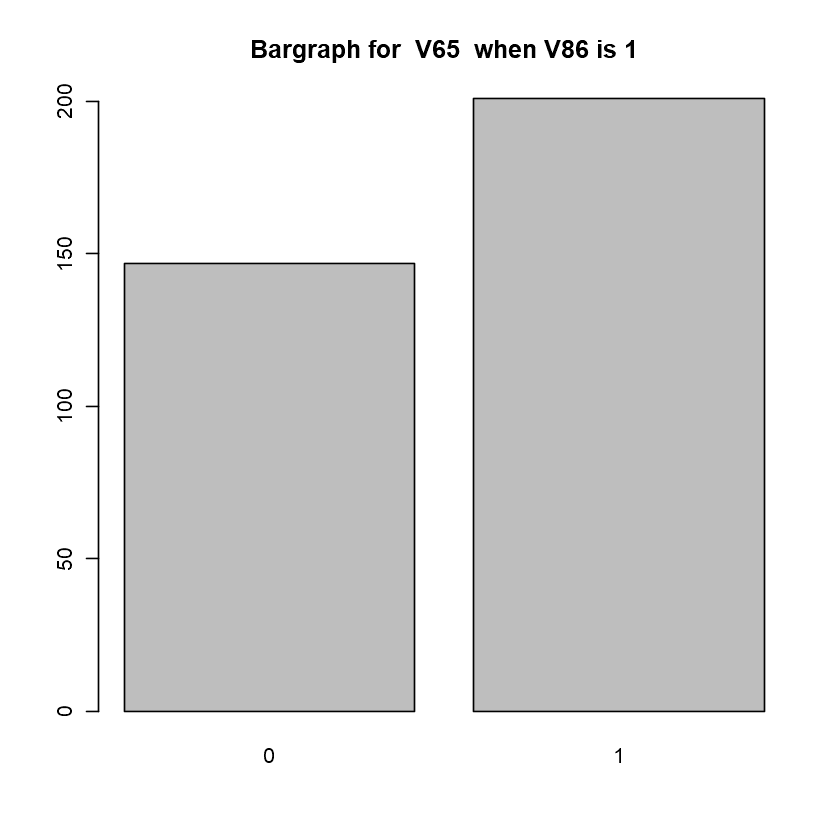

In [30]:
correlated_cols <- c("V47", "V68", "V82", "V44", "V43", "V59", "V61", "V42", "V65") 
#                      ,"V16", "V31", "V10", "V32", "V85", "V19", "V25", "V64", "V80", "V40")

for (i in correlated_cols){
    x<-traindata[,i]
    barplot(table(x[traindata$V86==1]), main=paste("Bargraph for ", i, " when V86 is 1"))
}


From above graph, we see (first 5 features):
- V47: more customers are contributing to car policies
- V68: More customers have 1 number of car policies
- V82: Many customers do not have boat policies
- V44: Contribution private third party insurance is 50-99 for most customers
- V43: Purchasing power class lies around 3-7
- V59: More customers have 4 number of contributions to fire policies
- V69: Many customers do not contribute to boat policies
- V42: Average income lies around 4
- V65: Many cusomers have private third party insurance

## 3. Model Development<a class="anchor" id="sec_3"></a>

In this phase, we will do below sub activity:

    1. Feature selection

    2. Build model

#### 3.1: Feature Selection

For feature selection, we will use logistic regression model.

We know the top 20 high correlated features with V86. We will create a model based on those 20 features and see model summary...

In [31]:
fit.glm1 = glm(V86 ~ V47 + V68 + V82 + V44 + V43 + V59 + V61 + V42 + V65 + V16 + 
               V31 + V10 + V32 + V85 + V19 + V25 + V64 + V80 + V40, 
               data = traindata, family = binomial)

summary(fit.glm1)


Call:
glm(formula = V86 ~ V47 + V68 + V82 + V44 + V43 + V59 + V61 + 
    V42 + V65 + V16 + V31 + V10 + V32 + V85 + V19 + V25 + V64 + 
    V80 + V40, family = binomial, data = traindata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5972  -0.3814  -0.2651  -0.1814   3.1268  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.853467   0.344085 -17.012  < 2e-16 ***
V47          0.226317   0.040520   5.585 2.33e-08 ***
V68         -0.035041   0.169569  -0.207   0.8363    
V82          2.025857   0.913992   2.216   0.0267 *  
V44          0.680565   0.382179   1.781   0.0750 .  
V43          0.073226   0.035479   2.064   0.0390 *  
V59          0.152425   0.066174   2.303   0.0213 *  
V61          0.020098   0.273841   0.073   0.9415    
V42          0.041953   0.061955   0.677   0.4983    
V65         -0.948870   0.762547  -1.244   0.2134    
V16          0.118472   0.048449   2.445   0.0145 *  
V31          0.017793   0.023377   0

- The z-value is the regression coefficient divided by its standard error. It is also sometimes called the z-statistic. If the z-value is too big in magnitude (i.e., either too positive or too negative), it indicates that the corresponding true regression coefficient is not 0 and the corresponding X-variable matters.
- Residual deviance indicates how well the response variable is predicted with your model.
- AIC defines the quality of model. The lower the better.

- From the above highly positively correlated features, we see that V47 is highly significant as well. Followed by V82, V43, V59, V16 and V32 also being significant but less than V47. Followed by V44 and V10 as least significant.
- The AIC is 2382 for this model

However, we also want to find out the features(from entire dataset) which are not highly corelated but are significant. Threfore, we pass all the feature in below model:

In [32]:
fit.glm2 = glm(V86 ~ ., data = traindata, family = binomial) # . for all features
summary(fit.glm2)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = V86 ~ ., family = binomial, data = traindata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7047  -0.3711  -0.2450  -0.1588   3.2916  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.542e+02  1.116e+04   0.023  0.98183    
V1           6.580e-02  4.624e-02   1.423  0.15468    
V2          -1.832e-01  1.927e-01  -0.951  0.34157    
V3          -2.696e-02  1.399e-01  -0.193  0.84723    
V4           2.096e-01  1.016e-01   2.063  0.03911 *  
V5          -2.767e-01  2.076e-01  -1.333  0.18247    
V6          -1.142e-01  1.069e-01  -1.068  0.28535    
V7          -1.910e-02  1.177e-01  -0.162  0.87112    
V8          -1.618e-02  1.055e-01  -0.153  0.87818    
V9          -6.817e-02  1.113e-01  -0.612  0.54024    
V10          2.310e-01  1.566e-01   1.475  0.14031    
V11          8.509e-02  1.466e-01   0.580  0.56169    
V12          1.467e-01  1.562e-01   0.939  0.34759    
V13         -8.291e-02  1.311e-01 

- From above model which has all the features, we see that V47 is highly significant as well. Followed by V59. Followed by V55, V76 and V82 also being significant but less than V47 and V59. And at last, followed by V52 as least significant.
- AIC is not better than first model(fit.glm1)

Comparing fit.glm1 and fit.glm2, we can judge that V47, V82, V59, V43, V16, V32, V4, V52, V55 and V76 can be good features. So lets create a model on these features:

In [33]:
fit.glm3 = glm(V86 ~ V47 + V82 + V59 + V43 + V16 + V32 + V4 + V52 + V55 + V76, data = traindata, family = binomial)
summary(fit.glm3)


Call:
glm(formula = V86 ~ V47 + V82 + V59 + V43 + V16 + V32 + V4 + 
    V52 + V55 + V76, family = binomial, data = traindata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6179  -0.3840  -0.2720  -0.1799   3.1079  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.88798    0.38739 -15.199  < 2e-16 ***
V47          0.23816    0.02360  10.091  < 2e-16 ***
V82          2.06978    0.37333   5.544 2.95e-08 ***
V59          0.17337    0.03117   5.563 2.65e-08 ***
V43          0.11436    0.03241   3.528 0.000418 ***
V16          0.11364    0.03483   3.262 0.001105 ** 
V32          0.13379    0.03952   3.385 0.000711 ***
V4           0.09438    0.07345   1.285 0.198778    
V52         -0.24213    0.11541  -2.098 0.035904 *  
V55         -0.20909    0.11208  -1.865 0.062116 .  
V76          0.40539    0.21448   1.890 0.058740 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial famil

The AIC seems to reduce from above both models

Lets us try to remove the less significant features from fit.glm3 and check the summary of model:

In [34]:
fit.glm4 = glm(V86 ~ V47 + V82 + V59 + V43 + V16 + V32 + V52, data = traindata, family = binomial)
summary(fit.glm4)


Call:
glm(formula = V86 ~ V47 + V82 + V59 + V43 + V16 + V32 + V52, 
    family = binomial, data = traindata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5833  -0.3843  -0.2721  -0.1812   3.1006  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.55221    0.29140 -19.054  < 2e-16 ***
V47          0.23726    0.02356  10.070  < 2e-16 ***
V82          2.04695    0.36901   5.547 2.90e-08 ***
V59          0.17342    0.03077   5.636 1.74e-08 ***
V43          0.10864    0.03225   3.369 0.000755 ***
V16          0.11360    0.03470   3.274 0.001062 ** 
V32          0.12895    0.03940   3.273 0.001063 ** 
V52         -0.24407    0.11506  -2.121 0.033901 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2635.5  on 5821  degrees of freedom
Residual deviance: 2360.8  on 5814  degrees of freedom
AIC: 2376.8

Number of Fisher Scoring iterations

Reviewing fit.glm4 summary, we find that it is not making very impressive improvement from fit.glm3. Therefore, we stick with fit.glm3 as our model. 

On the other hand, we will try another method to find the best predictors by using step(). We'll use the 20 highly positively correlated features and significant (" * ", " ** ", " *** ") features from fit.glm2

In [35]:
# create a model for step(). This model has features same as fit.glm3
fit.glm.step = glm(V86 ~ V47 + V68 + V82 + V44 + V43 + V59 + V61 + V42 + V65 + V16 + V31 + 
               V10 + V32 + V85 + V19 + V25 + V64 + V80 + V40 + V4 + V52 + V55 + V76, 
               data = traindata, family = binomial)

summary(fit.glm.step)


Call:
glm(formula = V86 ~ V47 + V68 + V82 + V44 + V43 + V59 + V61 + 
    V42 + V65 + V16 + V31 + V10 + V32 + V85 + V19 + V25 + V64 + 
    V80 + V40 + V4 + V52 + V55 + V76, family = binomial, data = traindata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6000  -0.3780  -0.2631  -0.1795   3.1341  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.243051   0.446725 -13.975  < 2e-16 ***
V47          0.233885   0.040200   5.818 5.95e-09 ***
V68         -0.059936   0.167436  -0.358   0.7204    
V82          1.965651   0.919322   2.138   0.0325 *  
V44          0.697537   0.389545   1.791   0.0734 .  
V43          0.079325   0.035797   2.216   0.0267 *  
V59          0.176851   0.068979   2.564   0.0104 *  
V61          0.046527   0.275948   0.169   0.8661    
V42          0.047544   0.061980   0.767   0.4430    
V65         -1.029794   0.777354  -1.325   0.1853    
V16          0.115987   0.048819   2.376   0.0175 *  
V31          

In [36]:
step1 <- step(fit.glm.step)

Start:  AIC=2379.26
V86 ~ V47 + V68 + V82 + V44 + V43 + V59 + V61 + V42 + V65 + V16 + 
    V31 + V10 + V32 + V85 + V19 + V25 + V64 + V80 + V40 + V4 + 
    V52 + V55 + V76

       Df Deviance    AIC
- V19   1   2331.3 2377.3
- V61   1   2331.3 2377.3
- V64   1   2331.3 2377.3
- V68   1   2331.4 2377.4
- V40   1   2331.5 2377.5
- V25   1   2331.8 2377.8
- V31   1   2331.8 2377.8
- V42   1   2331.8 2377.8
- V85   1   2331.9 2377.9
- V80   1   2332.3 2378.3
- V4    1   2333.2 2379.2
- V65   1   2333.2 2379.2
<none>      2331.3 2379.3
- V52   1   2334.6 2380.6
- V44   1   2335.0 2381.0
- V10   1   2335.1 2381.1
- V76   1   2335.6 2381.6
- V82   1   2335.8 2381.8
- V43   1   2336.2 2382.2
- V55   1   2336.2 2382.2
- V16   1   2336.7 2382.7
- V32   1   2336.7 2382.7
- V59   1   2338.0 2384.0
- V47   1   2366.7 2412.7

Step:  AIC=2377.26
V86 ~ V47 + V68 + V82 + V44 + V43 + V59 + V61 + V42 + V65 + V16 + 
    V31 + V10 + V32 + V85 + V25 + V64 + V80 + V40 + V4 + V52 + 
    V55 + V76

       Df De

After 10 steps, we have found the combination of best features with low AIC value using step(). We shall use these features (from last step) as predictors for further analysis.

#### 3.2: Build model
    a. Logistic Regression
    b. Naive Bayes
    c. LDA
    d. QDA

####    a. We will generate logistic regression model based on combination of predictors found in feature selection. 

In [37]:
# Using the features from step() as our best predictors

fit.glm5 = glm(V86 ~ V47 + V43 + V44 + V82 + V42 + V10 + V59 + V16 + V32 + V55 + V76 + V85 + V52 + V65, 
               data = traindata, family = binomial)
summary(fit.glm5)


Call:
glm(formula = V86 ~ V47 + V43 + V44 + V82 + V42 + V10 + V59 + 
    V16 + V32 + V55 + V76 + V85 + V52 + V65, family = binomial, 
    data = traindata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5933  -0.3790  -0.2647  -0.1800   3.1453  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.96534    0.33511 -17.801  < 2e-16 ***
V47          0.22516    0.02395   9.402  < 2e-16 ***
V43          0.07996    0.03390   2.359  0.01833 *  
V44          0.72001    0.38843   1.854  0.06379 .  
V82          2.10159    0.37673   5.579 2.43e-08 ***
V42          0.07254    0.04989   1.454  0.14592    
V10          0.07979    0.03740   2.133  0.03292 *  
V59          0.12409    0.03774   3.288  0.00101 ** 
V16          0.09540    0.03740   2.551  0.01074 *  
V32          0.09323    0.04185   2.228  0.02591 *  
V55         -0.24157    0.11307  -2.136  0.03264 *  
V76          0.46837    0.21655   2.163  0.03055 *  
V85          0.60943    0

In [38]:
# finding the significance of our model

with(fit.glm5, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 1.529291e-55

Result of logistic regression:
- AIC is 2366.
- If we choose  𝛼=0.05 , the p-value shown above indicate that fit.glm5 fits significantly better than the null model.

####    b. Naive Bayes

In [39]:
#Fitting the Naive Bayes model
Naive_Bayes_Model=naiveBayes(as.factor(V86) ~ 
                             V47 + V82 + V44 + V43 + V59 + V42 + V65 + V16 + V10 + V32 + V85 + V52 + V55 + V76, 
                             data = traindata)

# Print the model summary
Naive_Bayes_Model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
         0          1 
0.94022673 0.05977327 

Conditional probabilities:
   V47
Y       [,1]     [,2]
  0 2.859335 2.914510
  1 4.718391 2.421328

   V82
Y          [,1]       [,2]
  0 0.003836317 0.06471266
  1 0.040229885 0.21091800

   V44
Y        [,1]      [,2]
  0 0.7478992 0.9519903
  1 1.1379310 0.9889582

   V43
Y       [,1]     [,2]
  0 4.187797 1.997301
  1 5.000000 2.010061

   V59
Y       [,1]     [,2]
  0 1.782974 1.875056
  1 2.531609 1.806690

   V42
Y       [,1]     [,2]
  0 3.754476 1.313607
  1 4.255747 1.295346

   V65
Y        [,1]      [,2]
  0 0.3918524 0.4904490
  1 0.5775862 0.4946549

   V16
Y       [,1]     [,2]
  0 1.426379 1.599997
  1 2.005747 1.868893

   V10
Y       [,1]    [,2]
  0 6.149616 1.92118
  1 6.715517 1.62725

   V32
Y       [,1]     [,2]
  0 6.012970 1.559355
  1 6.471264 1.377791

   V85
Y         [,1]      [

Result of Naive Bayes:

- Probabilities are (from model summary):
         0          1 
0.94022673 0.05977327 

####    c. LDA

In [40]:
fit.lda = lda(as.factor(V86) ~ V47 + V82 + V44 + V43 + V59 + V42 + V65 + V16 + V10 + V32 + V85 + V52 + V55 + V76, 
              data = traindata)
fit.lda

Call:
lda(as.factor(V86) ~ V47 + V82 + V44 + V43 + V59 + V42 + V65 + 
    V16 + V10 + V32 + V85 + V52 + V55 + V76, data = traindata)

Prior probabilities of groups:
         0          1 
0.94022673 0.05977327 

Group means:
       V47         V82       V44      V43      V59      V42       V65      V16
0 2.859335 0.003836317 0.7478992 4.187797 1.782974 3.754476 0.3918524 1.426379
1 4.718391 0.040229885 1.1379310 5.000000 2.531609 4.255747 0.5775862 2.005747
       V10      V32        V85        V52       V55        V76
0 6.149616 6.012970 0.01223968 0.09444647 0.1899890 0.07307271
1 6.715517 6.471264 0.04597701 0.06321839 0.2701149 0.13218391

Coefficients of linear discriminants:
            LD1
V47  0.19101372
V82  5.21113120
V44  0.62186323
V43  0.07387433
V59  0.12587009
V42  0.08821990
V65 -0.85363237
V16  0.12245050
V10  0.06762233
V32  0.06953144
V85  1.51671084
V52 -0.19334905
V55 -0.29478365
V76  0.70007199

Result of LDA:

- Probabilities are (from model summary):
         0          1 
0.94022673 0.05977327 

####    d. QDA

In [41]:
fit.qda = qda(as.factor(V86) ~ V47 + V82 + V44 + V43 + V59 + V42 + V65 + V16 + V10 + V32 + V85 + V52 + V55 + V76, 
              data = traindata)
fit.qda

Call:
qda(as.factor(V86) ~ V47 + V82 + V44 + V43 + V59 + V42 + V65 + 
    V16 + V10 + V32 + V85 + V52 + V55 + V76, data = traindata)

Prior probabilities of groups:
         0          1 
0.94022673 0.05977327 

Group means:
       V47         V82       V44      V43      V59      V42       V65      V16
0 2.859335 0.003836317 0.7478992 4.187797 1.782974 3.754476 0.3918524 1.426379
1 4.718391 0.040229885 1.1379310 5.000000 2.531609 4.255747 0.5775862 2.005747
       V10      V32        V85        V52       V55        V76
0 6.149616 6.012970 0.01223968 0.09444647 0.1899890 0.07307271
1 6.715517 6.471264 0.04597701 0.06321839 0.2701149 0.13218391

Result of QDA:

- Probabilities are (from model summary):
         0          1 
0.94022673 0.05977327 


## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

Here, we shall compute confusion matrix for each model and find the attributes like accuracy and sensitivity for each model

In [42]:
targets.glm5 <- targets # create a copy of targets

targets.glm5$V2 <- predict(fit.glm5, testdata, type = "response") # new column which stores the predictions

targets.glm5$V.pred <- rep(0, length(targets.glm5$V2)) # create a new column which stores value 0 for all records
targets.glm5$V.pred[targets.glm5$V2 > 0.5] <- 1 # Boundary as 0.5. Set value 1 where prediction is more than 0.5

confusionMatrix(table(targets.glm5$V1, targets.glm5$V.pred), positive="1") 

Confusion Matrix and Statistics

   
       0    1
  0 3757    5
  1  235    3
                                          
               Accuracy : 0.94            
                 95% CI : (0.9322, 0.9472)
    No Information Rate : 0.998           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0206          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.37500         
            Specificity : 0.94113         
         Pos Pred Value : 0.01261         
         Neg Pred Value : 0.99867         
             Prevalence : 0.00200         
         Detection Rate : 0.00075         
   Detection Prevalence : 0.05950         
      Balanced Accuracy : 0.65807         
                                          
       'Positive' Class : 1               
                                          

The accuracy of logistic regression is 94%
Sensitivity defines correctly identified case. It is 37.5%

In [43]:
# Passing the prediction to generate confusion matrix
confusionMatrix(table(targets$V1, predict(Naive_Bayes_Model,testdata)), positive="1") 

Confusion Matrix and Statistics

   
       0    1
  0 3576  186
  1  202   36
                                         
               Accuracy : 0.903          
                 95% CI : (0.8934, 0.912)
    No Information Rate : 0.9445         
    P-Value [Acc > NIR] : 1.0000         
                                         
                  Kappa : 0.1051         
 Mcnemar's Test P-Value : 0.4464         
                                         
            Sensitivity : 0.1622         
            Specificity : 0.9465         
         Pos Pred Value : 0.1513         
         Neg Pred Value : 0.9506         
             Prevalence : 0.0555         
         Detection Rate : 0.0090         
   Detection Prevalence : 0.0595         
      Balanced Accuracy : 0.5543         
                                         
       'Positive' Class : 1              
                                         

The accuracy of Naive Bayes is 90%
Sensitivity is 16%

In [44]:
confusionMatrix(table(targets$V1, predict(fit.lda,testdata)$class), positive="1") 

Confusion Matrix and Statistics

   
       0    1
  0 3748   14
  1  234    4
                                          
               Accuracy : 0.938           
                 95% CI : (0.9301, 0.9453)
    No Information Rate : 0.9955          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0231          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.22222         
            Specificity : 0.94124         
         Pos Pred Value : 0.01681         
         Neg Pred Value : 0.99628         
             Prevalence : 0.00450         
         Detection Rate : 0.00100         
   Detection Prevalence : 0.05950         
      Balanced Accuracy : 0.58173         
                                          
       'Positive' Class : 1               
                                          

The accuracy of LDA is 94%
Sensitivity is 22%

In [45]:
confusionMatrix(table(targets$V1, predict(fit.qda,testdata)$class), positive="1") 

Confusion Matrix and Statistics

   
       0    1
  0 3636  126
  1  214   24
                                          
               Accuracy : 0.915           
                 95% CI : (0.9059, 0.9235)
    No Information Rate : 0.9625          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0815          
 Mcnemar's Test P-Value : 2.379e-06       
                                          
            Sensitivity : 0.1600          
            Specificity : 0.9444          
         Pos Pred Value : 0.1008          
         Neg Pred Value : 0.9665          
             Prevalence : 0.0375          
         Detection Rate : 0.0060          
   Detection Prevalence : 0.0595          
      Balanced Accuracy : 0.5522          
                                          
       'Positive' Class : 1               
                                          

The accuracy of QDA is 91.5%
Sensitivity is 16%

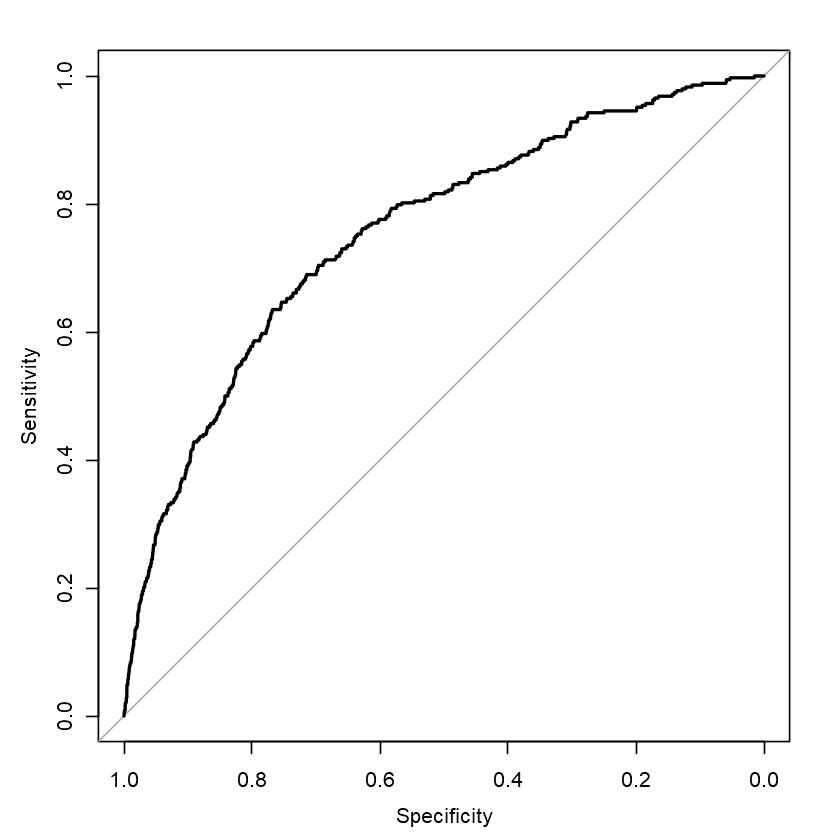

In [46]:
# Create data for roc curve and plot it
traindata$glm.roc=predict(fit.glm5,type=c("response"))
g <- roc(V86 ~ glm.roc, data = traindata)
plot(g) 

The ROC curve represents the correctness of prediction. The more it is towards top-left, the better prediction

##### By comparing the models, we see that accuracy and sensitivity for logistic regression is good when compared to other models 

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

As per assignment, we are required to select top 800 customers with high probability of having "1" in V86. Then we see how many customers have "0" as true value and identify them as potential customers for buying insurance. The marketing strategy here is to find the potential insurance buyers who do not have V86 insurance (0 in V86)

First we find the 0s from all models as later we will target them

####    a. Logistic regression

In [47]:
targets.glm <- targets # create a copy

probs.glm <- predict(fit.glm5, testdata, type = "response") # store the predicted probabilities

targets.glm$V2 <- probs.glm #store the probabilities in a new column in df

targets.glm<-targets.glm[order(targets.glm$V2, decreasing = TRUE),] # sort probabilities high to low
targets.glm<-targets.glm[1:800,] # select first 800 records

targets.glm$V.pred <- rep(0, length(targets.glm$V2)) # create a new column with value 0 for all records
targets.glm$V.pred[targets.glm$V2 > 0.5] <- 1 # Boundary as 0.5. Set value 1 where prediction is more than 0.5

table(targets.glm$V1) # Count/frequency of factors
# confusionMatrix(table(targets.glm$V1, targets.glm$V.pred), positive="1") 


  0   1 
685 115 

####    b. Naive Bayes

In [48]:
# Created a new df similar to above (logistic reg) and capture the counts of factors in true values

targets.nb <- targets

pred.glm=predict(Naive_Bayes_Model,testdata)
targets.nb$V2 <- pred.glm
targets.nb<-targets.nb[order(targets.nb$V2, decreasing = TRUE),]
targets.nb<-targets.nb[1:800,]
# confusionMatrix(table(targets.nb$V1, targets.nb$V2), positive="1") 
table(targets.nb$V1)


  0   1 
744  56 

####    c. LDA

In [49]:
# Created a new df similar to above (Naive bayes) and capture the counts of factors in true values

targets.lda <- targets

pred.lda=predict(fit.lda,testdata)
targets.lda$V2 <- pred.lda$class
targets.lda<-targets.lda[order(targets.lda$V2, decreasing = TRUE),]
targets.lda<-targets.lda[1:800,]
# confusionMatrix(table(targets.lda$V1, targets.lda$V2), positive="1") 
table(targets.lda$V1)


  0   1 
759  41 

####    d. QDA

In [50]:
# Created a new df similar to above (Naive bayes) and capture the counts of factors in true values

targets.qda <- targets

pred.qda=predict(fit.qda,testdata)
targets.qda$V2 <- pred.qda$class
targets.qda<-targets.qda[order(targets.qda$V2, decreasing = TRUE),]
targets.qda<-targets.qda[1:800,]
# confusionMatrix(table(targets.qda$V1, targets.qda$V2), positive="1") 
table(targets.qda$V1)


  0   1 
754  46 

We have potential customers who do not have insurance for each model as below:

- Logistic regression - 685
- Naive Bayes - 744
- LDA - 759
- QDA - 754

In [51]:
# Run anova test

anova(fit.glm5)

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,5821,2635.540
V47,1,141.5980927,5820,2493.942
V43,1,50.6412449,5819,2443.301
V44,1,26.8280749,5818,2416.473
V82,1,27.0680627,5817,2389.405
V42,1,11.7093062,5816,2377.696
V10,1,7.8922910,5815,2369.803
V59,1,6.8989265,5814,2362.904
V16,1,7.3291656,5813,2355.575
V32,1,5.3509678,5812,2350.224


From the features used in the model and having anova test done, we see below variables as important ones:
    - V47 (PPERSAUT Contribution car policies)
    - V43 (MKOOPKLA Purchasing power class)
    - V44 (PWAPART Contribution private third party insurance)
    - V82 (APLEZIER Number of boat policies)
    - V42 MINKGEM Average income
    
Variable labels are refered from http://liacs.leidenuniv.nl/~puttenpwhvander/library/cc2000/data.html

From anova table, we can see the drop in deviance when adding each variable one at a time.

From above information and barplots earlier, we target customers who contibute more to car policies and purchasing power class lies around 3-7. The contribution to private third party insurance is 50-99 and many customers should not have boat insurance.
Lastly, average income lies around 4 for many customers

## 6. Conclusion <a class="anchor" id="sec_6"></a>

We compared the models based on different factors like accuracy, sensitivity, etc. We find that logistic regression is better than naive bayes, LDA and QDA. We also find the V47, V43, V44, v82 and V42 as best predictors for our model.


Company has limited budget for marketing for capturing potential insurance buyers. USing logistic regression we find have narrowed down our search for the potential buyers to 685 customers. Whereas other models predicted to target 744, 759 and 754 respectively. Therefore, logistic regression is good for company's marketing budget

Finally, we can say that we have a good model and know which customers should be targeted to buy V86 insurance.

## 7. References <a class="anchor" id="sec_7"></a>

- Pie Charts https://www.statmethods.net/graphs/pie.html
- Naïve Bayes Classifier Using R https://www.r-bloggers.com/understanding-naive-bayes-classifier-using-r/
- ggplot2 matrix of plots http://www.sthda.com/english/wiki/ggally-r-package-extension-to-ggplot2-for-correlation-matrix-and-survival-plots-r-software-and-data-visualization
- ROC Curves https://blog.revolutionanalytics.com/2016/08/roc-curves-in-two-lines-of-code.html
- Tutorial solutions